#### Problem Statement : 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Our Goals of the Case Study:
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. Adjust the model to if the company's requirement changes in the future so you will need to handle these as well.

#### The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### Step-1: Read and Understand the data

In [1]:
#Import all required modules

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#Read data
leadsDf = pd.read_csv('Leads.csv')

print("Shape of dataset: "+ str(leadsDf.shape))
# Look at the first few entries
leadsDf.head()

Shape of dataset: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leadsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step-2: Clean The Data

In [4]:
leadsDf.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

As we can see there are lot of column which have high number of missing values. 
Clearly, these columns are not useful. Since, there are 9000+ datapoints in our dataframe.
So, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [5]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leadsDf.columns:
    if leadsDf[col].isnull().sum() > 3000:
        leadsDf.drop(col, 1, inplace=True)

In [6]:
leadsDf.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Lead Origin                                         0
Do Not Email                                        0
Converted                                           0
Total Time Spent on Website                         0
Do Not Call                                         0
Last Notable Activity                               0
A free copy of Mastering The

There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [7]:
# Get the value counts of all the columns
for column in leadsDf:
    print(leadsDf[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

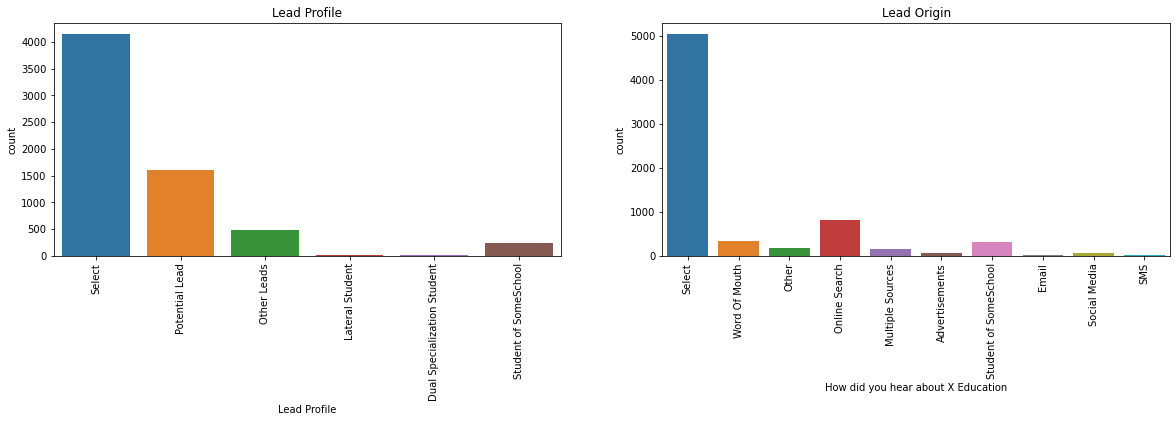

In [8]:
plt.figure(figsize = (20,30))

plt.subplot(6,2,1)
sns.countplot(leadsDf['Lead Profile']).tick_params(axis='x', rotation = 90)
plt.title('Lead Profile')

plt.subplot(6,2,2)
sns.countplot(leadsDf['How did you hear about X Education']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')


plt.show()


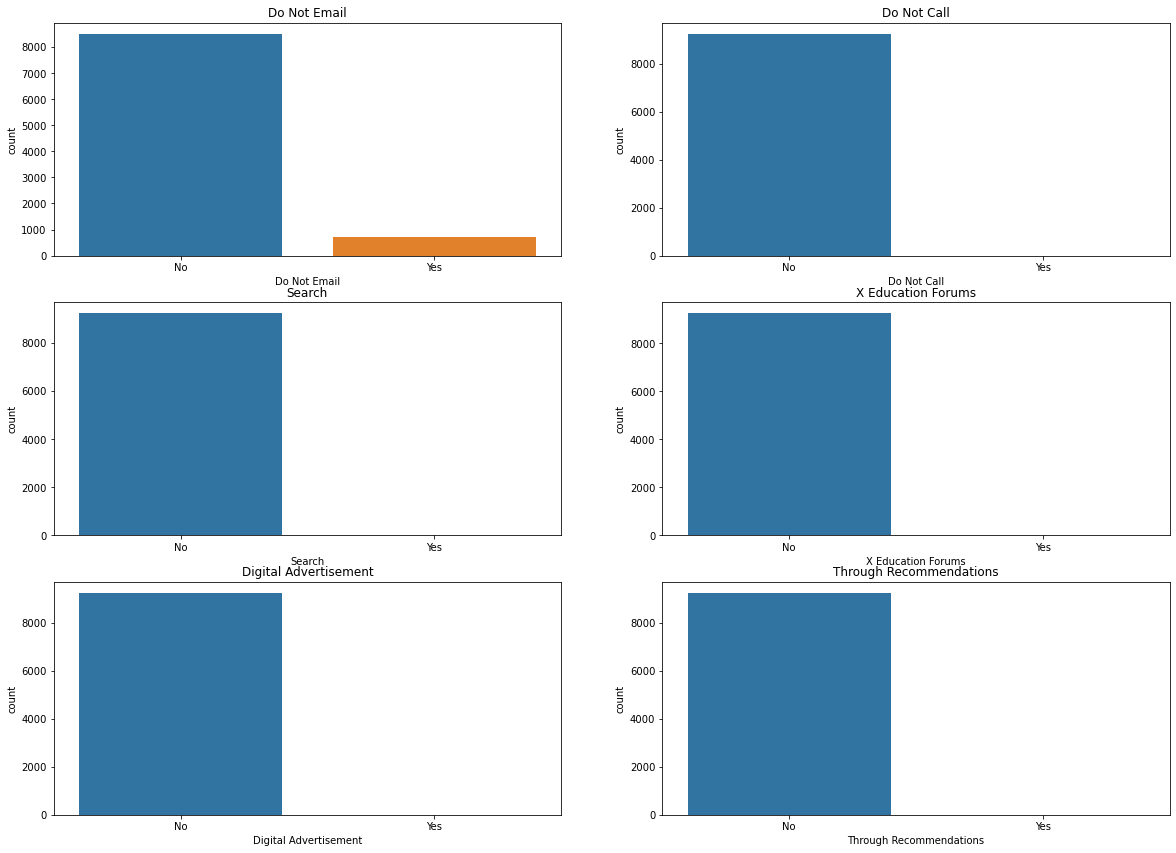

In [9]:
plt.figure(figsize = (20,30))
plt.subplot(6,2,1)
sns.countplot(leadsDf['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,2)
sns.countplot(leadsDf['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,3)
sns.countplot(leadsDf['Search'])
plt.title('Search')

plt.subplot(6,2,4)
sns.countplot(leadsDf['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,5)
sns.countplot(leadsDf['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,6)
sns.countplot(leadsDf['Through Recommendations'])
plt.title('Through Recommendations')


plt.show()

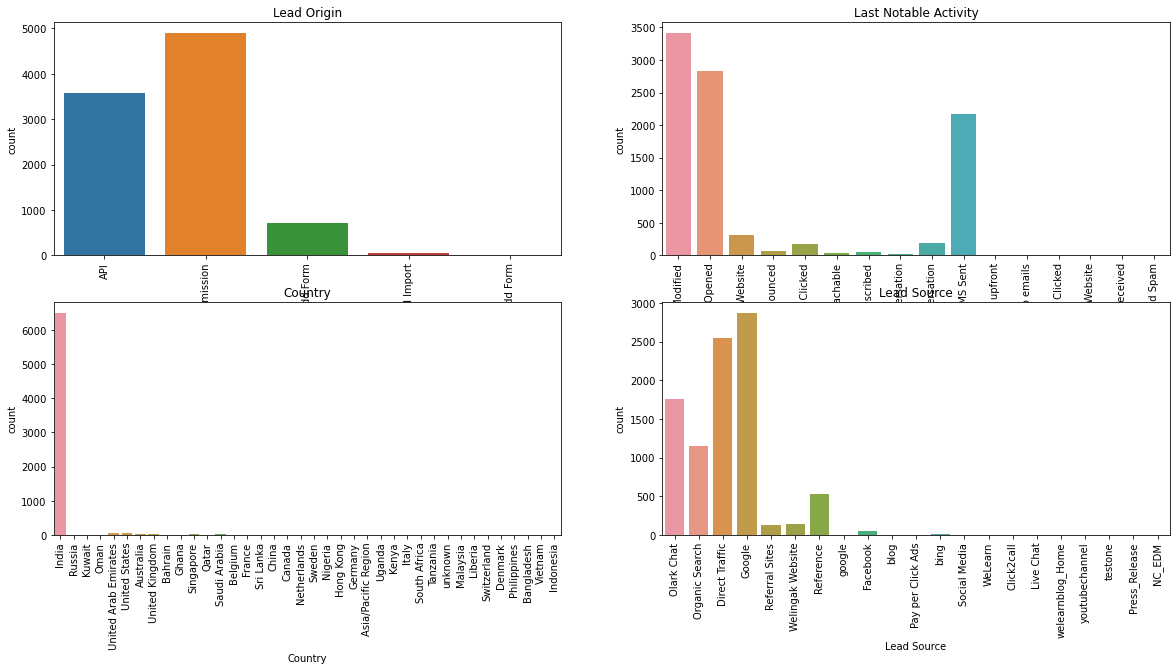

In [10]:
plt.figure(figsize = (20,30))
plt.subplot(6,2,1)
sns.countplot(leadsDf['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leadsDf['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(6,2,3)
sns.countplot(leadsDf['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')


plt.subplot(6,2,4)
sns.countplot(leadsDf['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

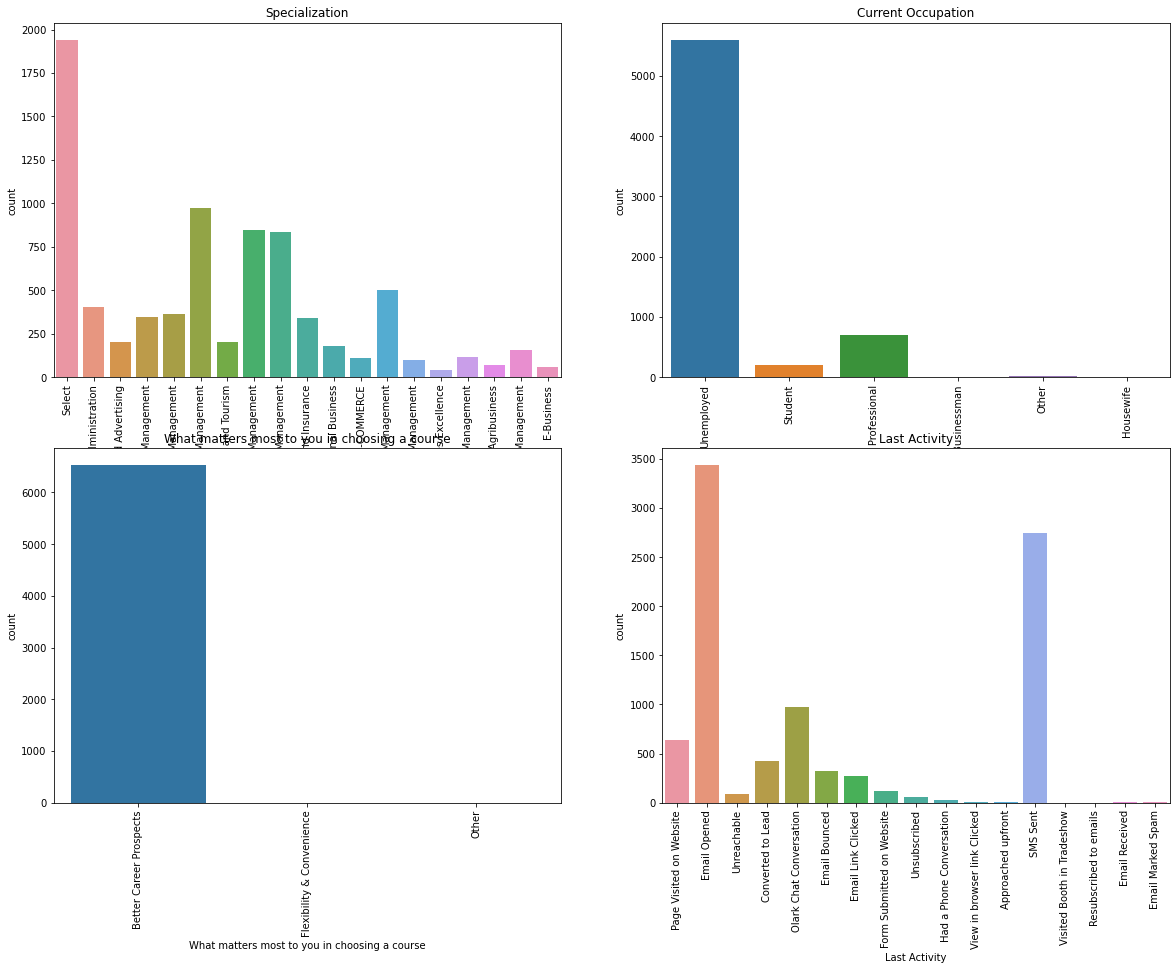

In [11]:
plt.figure(figsize = (20,30))
plt.subplot(4,2,1)
sns.countplot(leadsDf['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(4,2,2)
sns.countplot(leadsDf['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(4,2,3)
sns.countplot(leadsDf['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(4,2,4)
sns.countplot(leadsDf['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

1. Clearly the levels "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

2. Also notice that when you got the value counts of all the columns,there were a few columns in which only one value was majorly present for all the data points. 
These include 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

3. Since X education is an online education platform considering the variable "City" & "Country" won't be of any use in our analysis. So it's best that we drop it.

4. Also, by looking at values in the variables "Prospect ID" and "Lead Number" won't be of any use in the analysis, so it's best that we drop these two variables.

5. The variable "What matters most to you in choosing a course" has the level Better Career Prospects 6528 times while the other two levels appears very less. So we should drop this column as well.

In [12]:
leadsDf.drop(['Lead Profile','How did you hear about X Education','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','City','Country','Prospect ID','Lead Number','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [13]:
# Check the number of null values again
leadsDf.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
dtype: int64

Now, there's the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [14]:
leadsDf = leadsDf[~pd.isnull(leadsDf['What is your current occupation'])]

In [15]:
# Check the number of null values again
leadsDf.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [16]:
# Drop the null value rows in the column 'Page Views Per Visit'

leadsDf = leadsDf[~pd.isnull(leadsDf['Page Views Per Visit'])]

# Check the number of null values again
leadsDf.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
dtype: int64

In [17]:
# Drop the null value rows in the column 'Lead Source'

leadsDf = leadsDf[~pd.isnull(leadsDf['Lead Source'])]

# Check the number of null values again
leadsDf.isnull().sum().sort_values(ascending=False)

Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Source                                0
Lead Origin                                0
dtype: int64

In [18]:
# Drop the null value rows in the column 'Specialization'

leadsDf = leadsDf[~pd.isnull(leadsDf['Specialization'])]

# Check the number of null values again
leadsDf.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
dtype: int64

#### Outlier treatment for Numerical Columns

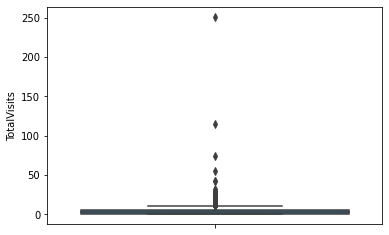

In [19]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leadsDf['TotalVisits'])
plt.show()

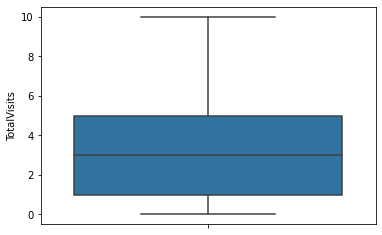

In [20]:
#capping the outliers to 95% value for analysis

percentiles = leadsDf['TotalVisits'].quantile([0.05,0.95]).values
leadsDf['TotalVisits'][leadsDf['TotalVisits'] <= percentiles[0]] = percentiles[0]
leadsDf['TotalVisits'][leadsDf['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leadsDf['TotalVisits'])
plt.show()

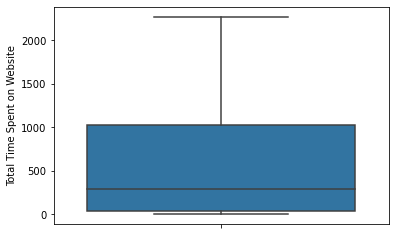

In [21]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leadsDf['Total Time Spent on Website'])
plt.show()

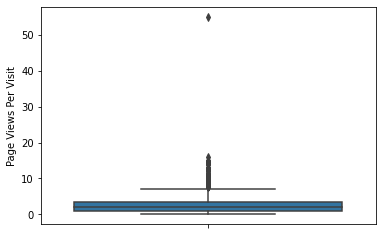

In [22]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leadsDf['Page Views Per Visit'])
plt.show()

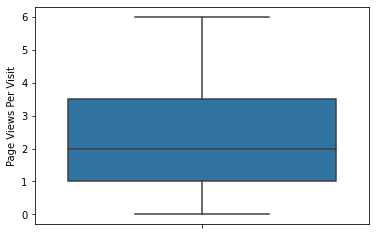

In [23]:
# capping the outliers to 95% value for analysis
percentiles = leadsDf['Page Views Per Visit'].quantile([0.05,0.95]).values
leadsDf['Page Views Per Visit'][leadsDf['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leadsDf['Page Views Per Visit'][leadsDf['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leadsDf['Page Views Per Visit'])
plt.show()

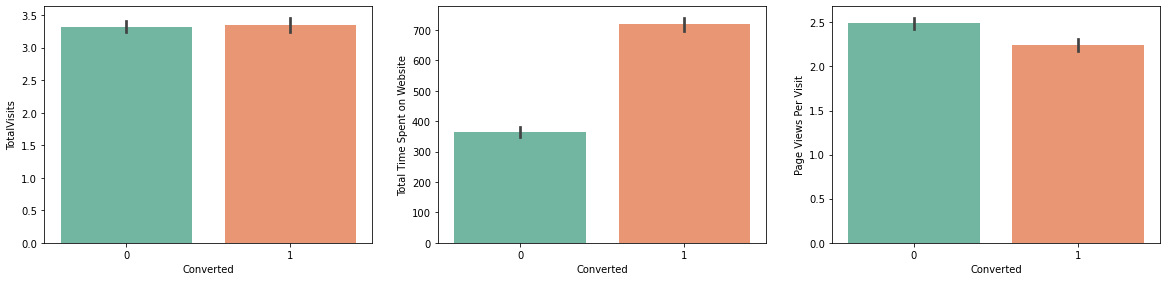

In [24]:
#plottin subplots
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadsDf)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadsDf)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadsDf)
plt.show()

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [25]:
print(len(leadsDf.index))
print(len(leadsDf.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good number for our analysis.

In [26]:
# Let's look at the dataset again
leadsDf.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Step-3: Prepare the data for Model Building

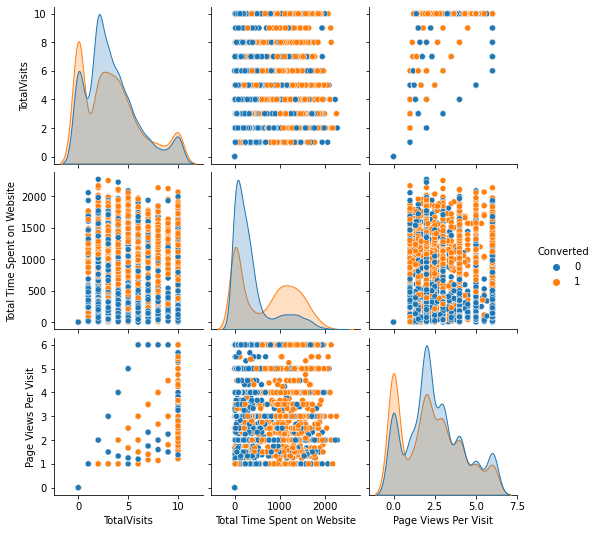

In [27]:
sns.pairplot(leadsDf,diag_kind='kde',hue='Converted')
plt.show()

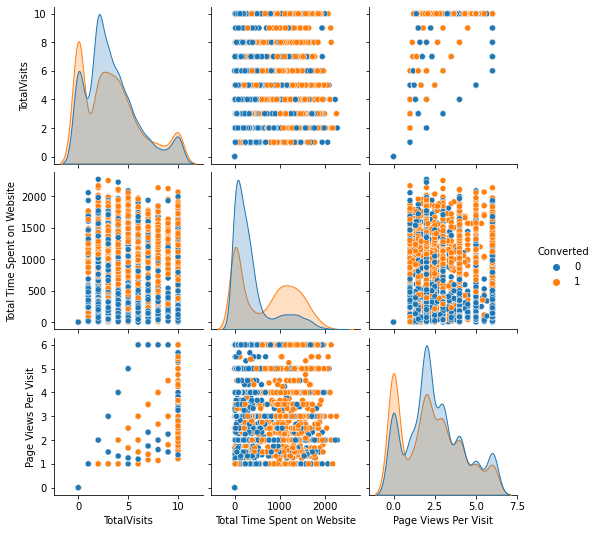

In [28]:
xedu = leadsDf[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [29]:
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.509124,-1.532509,-1.513432,-0.962570
1,0.734597,0.641870,0.207758,-0.962570
2,-0.290466,1.262512,-0.066779,1.038885
3,-0.791485,0.153656,-0.695227,-0.962570
4,-0.290466,1.204175,-0.695227,1.038885


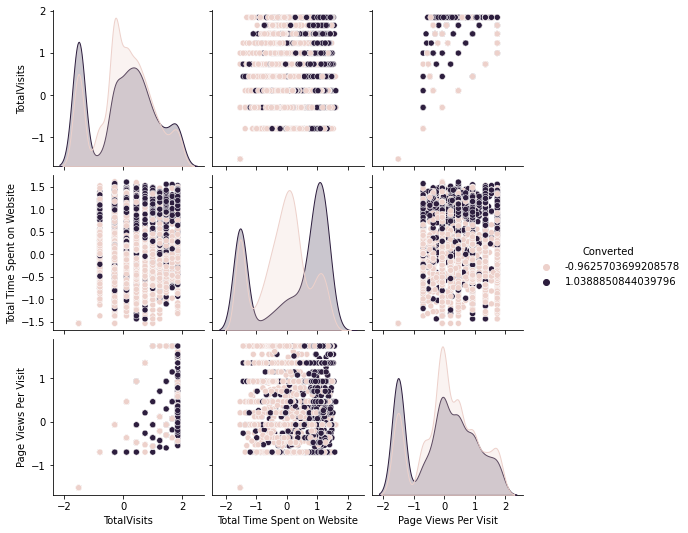

In [30]:
sns.pairplot(transformedxedu,diag_kind='kde',hue='Converted')
plt.show()

#### Dummy variable creation
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [31]:
# Check the columns which are of type 'object'

temp = leadsDf.loc[:, leadsDf.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [32]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leadsDf[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leadsDf = pd.concat([leadsDf, dummy], axis=1)

In [33]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leadsDf['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leadsDf = pd.concat([leadsDf, dummy_spl], axis = 1)

In [34]:
# Drop the variables for which the dummy variables have been created

leadsDf = leadsDf.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

# Let's take a look at the dataset again
print(leadsDf.shape)
leadsDf.head()

(6373, 75)


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Test-Train Split
The next step is to split the dataset into training an testing sets.

In [35]:
# Put all the feature variables in X
X = leadsDf.drop(['Converted'], 1)
X.head()

# Put the target variable in y
y = leadsDf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [37]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.4,0.029489,0.333333,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.4,0.082306,0.666667,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.6,0.034331,1.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Looking at the correlations.
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [38]:
# Looking at the correlation table
leadsDf.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005226,0.313338,-0.068701,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005226,1.000000,0.354865,0.753921,0.432941,-0.351438,-0.071282,0.102839,-0.069437,0.188543,...,0.039415,0.052842,0.013208,0.063265,0.030744,0.024025,0.042499,0.026724,0.053227,0.107154
Total Time Spent on Website,0.313338,0.354865,1.000000,0.355189,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.068701,0.753921,0.355189,1.000000,0.529268,-0.395747,-0.078890,0.133787,-0.075303,0.240110,...,0.055748,0.070055,0.029904,0.072294,0.040174,0.028921,0.030721,0.016716,0.060271,0.117559
Lead Origin_Landing Page Submission,-0.117563,0.432941,0.275606,0.529268,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.024025,0.024919,0.028921,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.042499,0.018767,0.030721,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.026724,0.003203,0.016716,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.053227,0.045386,0.060271,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


### Step-4: Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [39]:
# Create a LogisticRegression object
logreg = LogisticRegression()

In [40]:
# Running RFE and select 15 variables
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [41]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_ ))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 40),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 10),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link C

In [42]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [43]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [44]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.1
Date:                Tue, 03 Jan 2023   Deviance:                       4132.3
Time:                        22:10:02   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2948      0.599     -2.160      0.031      -2.469      -0.120
TotalVisits                                              1.0357      0.171      6.044      0.000       0.700       1.372
Total Time Spent on Website                              4.3979      0.186     23.696      0.000       4.034       4.762
Lead Origin_Lead Add Form                                3.1736      1.193      2.660      0.008       0.835       5.512
Lead Source_Olark Chat                                   1.6679      0.133     12.507      0.000       1.406       1.929
Lead Source_Reference                                    1.2968      1.215      1.068      0.286      -1.084       3.678
Lead Source_Welingak Website                             3.4094      1.558      2.188      0.029       0.355       6.464
Do Not Email_Yes                                        -1.4652      0.193     -7.597      0.000      -1.843      -1.087
Last Activity_Had a Phone Conversation                   1.0343      0.986      1.049      0.294      -0.898       2.966
Last Activity_SMS Sent                                   1.1814      0.082     14.330      0.000       1.020       1.343
What is your current occupation_Housewife               22.7563   2.43e+04      0.001      0.999   -4.77e+04    4.77e+04
What is your current occupation_Student                 -1.0966      0.626     -1.751      0.080      -2.324       0.131
What is your current occupation_Unemployed              -1.2776      0.590     -2.167      0.030      -2.433      -0.122
What is your current occupation_Working Professional     1.3308      0.619      2.150      0.032       0.118       2.544
Last Notable Activity_Had a Phone Conversation          23.1211   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.7754      0.809      3.430      0.001       1.189       4.361
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [45]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.31
4,Lead Source_Reference,65.19
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,5.54
0,TotalVisits,3.70
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.42
12,What is your current occupation_Working Profes...,1.81
3,Lead Source_Olark Chat,1.68


In [46]:
# VIFs seem to be in a decent range except for three variables.
# Let's first drop the variable "Lead Source_Reference" since it has a high p-value as well as a high VIF.

X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [47]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.6
Date:                Tue, 03 Jan 2023   Deviance:                       4133.2
Time:                        22:10:02   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2944      0.599     -2.160      0.031      -2.469      -0.120
TotalVisits                                              1.0357      0.171      6.044      0.000       0.700       1.372
Total Time Spent on Website                              4.3979      0.186     23.696      0.000       4.034       4.762
Lead Origin_Lead Add Form                                4.4312      0.265     16.747      0.000       3.913       4.950
Lead Source_Olark Chat                                   1.6678      0.133     12.506      0.000       1.406       1.929
Lead Source_Welingak Website                             2.1518      1.037      2.075      0.038       0.120       4.184
Do Not Email_Yes                                        -1.4635      0.193     -7.595      0.000      -1.841      -1.086
Last Activity_Had a Phone Conversation                   1.0344      0.986      1.049      0.294      -0.898       2.966
Last Activity_SMS Sent                                   1.1814      0.082     14.330      0.000       1.020       1.343
What is your current occupation_Housewife               22.7582   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
What is your current occupation_Student                 -1.0958      0.626     -1.750      0.080      -2.323       0.131
What is your current occupation_Unemployed              -1.2782      0.589     -2.168      0.030      -2.434      -0.123
What is your current occupation_Working Professional     1.3312      0.619      2.151      0.031       0.118       2.544
Last Notable Activity_Had a Phone Conversation          23.1214   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.7758      0.809      3.431      0.001       1.190       4.362
========================================================================================================================
"""

In [48]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,5.54
0,TotalVisits,3.70
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.42
2,Lead Origin_Lead Add Form,1.90
11,What is your current occupation_Working Profes...,1.81
3,Lead Source_Olark Chat,1.68
7,Last Activity_SMS Sent,1.59
4,Lead Source_Welingak Website,1.33


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with "Last Notable Activity_Had a Phone Conversation".

In [49]:
# Dropping 'Last Notable Activity_Had a Phone Conversation' column
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.4
Date:                Tue, 03 Jan 2023   Deviance:                       4138.7
Time:                        22:10:02   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2968      0.599     -2.165      0.030      -2.471      -0.123
TotalVisits                                              1.0430      0.171      6.093      0.000       0.707       1.378
Total Time Spent on Website                              4.3907      0.185     23.672      0.000       4.027       4.754
Lead Origin_Lead Add Form                                4.4322      0.265     16.752      0.000       3.914       4.951
Lead Source_Olark Chat                                   1.6687      0.133     12.515      0.000       1.407       1.930
Lead Source_Welingak Website                             2.1516      1.037      2.075      0.038       0.120       4.184
Do Not Email_Yes                                        -1.4633      0.193     -7.596      0.000      -1.841      -1.086
Last Activity_Had a Phone Conversation                   2.7088      0.802      3.379      0.001       1.138       4.280
Last Activity_SMS Sent                                   1.1813      0.082     14.333      0.000       1.020       1.343
What is your current occupation_Housewife               21.7597   1.48e+04      0.001      0.999   -2.89e+04     2.9e+04
What is your current occupation_Student                 -1.0943      0.626     -1.748      0.080      -2.321       0.132
What is your current occupation_Unemployed              -1.2766      0.589     -2.166      0.030      -2.432      -0.122
What is your current occupation_Working Professional     1.3306      0.619      2.151      0.031       0.118       2.543
Last Notable Activity_Unreachable                        2.7748      0.809      3.430      0.001       1.189       4.361
========================================================================================================================
"""

In [50]:
# Droping "What is your current occupation_Housewife" column as well since having high P-values.
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Tue, 03 Jan 2023   Deviance:                       4143.6
Time:                        22:10:02   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7120      0.555     -1.282      0.200      -1.800       0.376
TotalVisits                                              1.0282      0.171      6.013      0.000       0.693       1.363
Total Time Spent on Website                              4.3883      0.185     23.669      0.000       4.025       4.752
Lead Origin_Lead Add Form                                4.4267      0.264     16.740      0.000       3.908       4.945
Lead Source_Olark Chat                                   1.6607      0.133     12.471      0.000       1.400       1.922
Lead Source_Welingak Website                             2.1501      1.037      2.074      0.038       0.118       4.182
Do Not Email_Yes                                        -1.4664      0.193     -7.602      0.000      -1.844      -1.088
Last Activity_Had a Phone Conversation                   2.7099      0.802      3.381      0.001       1.139       4.281
Last Activity_SMS Sent                                   1.1809      0.082     14.331      0.000       1.019       1.342
What is your current occupation_Student                 -1.6716      0.587     -2.849      0.004      -2.821      -0.522
What is your current occupation_Unemployed              -1.8538      0.548     -3.385      0.001      -2.927      -0.781
What is your current occupation_Working Professional     0.7530      0.579      1.301      0.193      -0.382       1.888
Last Notable Activity_Unreachable                        2.7713      0.809      3.424      0.001       1.185       4.358
========================================================================================================================
"""

In [51]:
#Dropping "What is your current occupation_Working Professional"
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Tue, 03 Jan 2023   Deviance:                       4145.1
Time:                        22:10:02   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0285      0.204     -0.140      0.889      -0.428       0.371
TotalVisits                                    1.0212      0.171      5.974      0.000       0.686       1.356
Total Time Spent on Website                    4.3887      0.185     23.669      0.000       4.025       4.752
Lead Origin_Lead Add Form                      4.4252      0.264     16.737      0.000       3.907       4.943
Lead Source_Olark Chat                         1.6593      0.133     12.466      0.000       1.398       1.920
Lead Source_Welingak Website                   2.1486      1.037      2.072      0.038       0.117       4.180
Do Not Email_Yes                              -1.4639      0.193     -7.592      0.000      -1.842      -1.086
Last Activity_Had a Phone Conversation         2.7137      0.801      3.386      0.001       1.143       4.284
Last Activity_SMS Sent                         1.1844      0.082     14.391      0.000       1.023       1.346
What is your current occupation_Student       -2.3531      0.282     -8.351      0.000      -2.905      -1.801
What is your current occupation_Unemployed    -2.5359      0.186    -13.630      0.000      -2.900      -2.171
Last Notable Activity_Unreachable              2.7723      0.809      3.425      0.001       1.186       4.359
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [52]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.70
0,TotalVisits,3.03
1,Total Time Spent on Website,2.17
7,Last Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.50
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.31
8,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.08
6,Last Activity_Had a Phone Conversation,1.01


Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

### Step-5: Model Evaluation

In [53]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.301084
218     0.142496
4171    0.141726
4037    0.288009
3660    0.954572
207     0.203869
2044    0.161987
6411    0.951200
6498    0.070506
2085    0.982178
dtype: float64

In [54]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30108364, 0.14249648, 0.14172634, 0.28800942, 0.95457199,
       0.20386926, 0.16198681, 0.9511996 , 0.07050593, 0.98217784])

In [55]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final

,Converted,Conversion_Prob
0,0,0.301084
1,0,0.142496
2,1,0.141726
3,1,0.288009
4,1,0.954572
...,...,...
4456,1,0.954572
4457,0,0.786637
4458,0,0.902690
4459,0,0.208337


In [56]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.301084,0
1,0,0.142496,0
2,1,0.141726,0
3,1,0.288009,0
4,1,0.954572,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.


In [57]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1920  392]
 [ 568 1581]]


In [58]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.784801613987895


In [59]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Calculate the sensitivity
print(TP/(TP+FN))

# Calculate the specificity
print(TN/(TN+FP))


0.7356910190786412
0.8304498269896193


#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [61]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [62]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

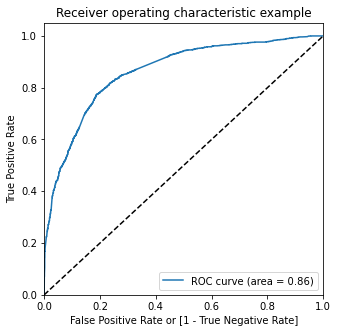

In [63]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [64]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301084,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142496,0,1,1,0,0,0,0,0,0,0,0
2,1,0.141726,0,1,1,0,0,0,0,0,0,0,0
3,1,0.288009,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954572,1,1,1,1,1,1,1,1,1,1,1


In [65]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.540910  0.990693  0.122837
0.2   0.2  0.696032  0.949279  0.460640
0.3   0.3  0.768662  0.865519  0.678633
0.4   0.4  0.789285  0.808748  0.771194
0.5   0.5  0.784802  0.735691  0.830450
0.6   0.6  0.758126  0.622150  0.884516
0.7   0.7  0.735485  0.541647  0.915657
0.8   0.8  0.711948  0.456957  0.948962
0.9   0.9  0.646043  0.284784  0.981834


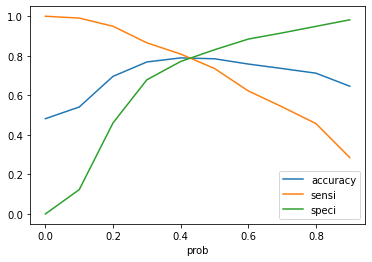

In [66]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [67]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.301084,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142496,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.141726,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.288009,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954572,1,1,1,1,1,1,1,1,1,1,1,1


In [68]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [69]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1819,  493],
       [ 442, 1707]], dtype=int64)

In [70]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Calculate the sensitivity
print(TP/(TP+FN))

# Calculate the specificity
print(TN/(TN+FP))


0.7943229409027455
0.7867647058823529


This cutoff point seems to be better one compare to 0.5

### Step-6: Making Predictions on the Test Set

In [72]:
# Scale the test set as well using just 'transform'
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.0,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.7,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.4,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.3,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.8,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [73]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [74]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.0,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.7,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.4,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.3,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.8,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.3,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.3,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,1.0,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.3,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [75]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [76]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996245
6122    0.151602
9202    0.702178
6570    0.294331
2668    0.763416
4233    0.794334
3368    0.675751
9091    0.534813
5972    0.261038
3631    0.794129
dtype: float64

In [77]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
4771,0.996245
6122,0.151602
9202,0.702178
6570,0.294331
2668,0.763416


In [78]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [79]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [80]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.996245
1,0,0.151602
2,0,0.702178
3,1,0.294331
4,1,0.763416


In [81]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [82]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996245
1,0,0.151602
2,0,0.702178
3,1,0.294331
4,1,0.763416


In [83]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [84]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996245,1
1,0,0.151602,0
2,0,0.702178,1
3,1,0.294331,0
4,1,0.763416,1


In [85]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7876569037656904

In [86]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[784, 212],
       [194, 722]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculate sensitivity
print(TP / float(TP+FN))

# Calculate specificity
print(TN / float(TN+FP))

0.7882096069868996
0.7871485943775101


#### Precision-Recall View

In [88]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1920,  392],
       [ 568, 1581]], dtype=int64)

###### Precision
TP / TP + FP

In [89]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.801317790167258

###### Recall
TP / TP + FN

In [90]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7356910190786412

##### Precision and recall tradeoff

In [91]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [92]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

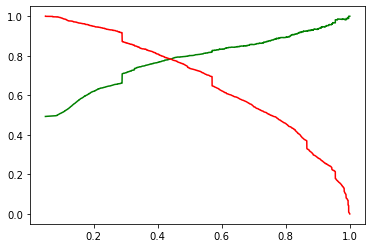

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.301084,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142496,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.141726,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.288009,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954572,1,1,1,1,1,1,1,1,1,1,1,1


In [95]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [96]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1819,  493],
       [ 442, 1707]], dtype=int64)

In [97]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# Calculate Precision
print(TP/(TP+FP))

# Calculate Recall
print(TP/(TP+FN))

0.7759090909090909
0.7943229409027455


#### Making Predictions on the Test Set

In [99]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996245
6122    0.151602
9202    0.702178
6570    0.294331
2668    0.763416
4233    0.794334
3368    0.675751
9091    0.534813
5972    0.261038
3631    0.794129
dtype: float64

In [100]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
4771,0.996245
6122,0.151602
9202,0.702178
6570,0.294331
2668,0.763416


In [101]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['Prospect ID'] = y_test_df.index

# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4771,0.996245
1,0,6122,0.151602
2,0,9202,0.702178
3,1,6570,0.294331
4,1,2668,0.763416


In [102]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,1,4771,0.996245
1,0,6122,0.151602
2,0,9202,0.702178
3,1,6570,0.294331
4,1,2668,0.763416


In [103]:
# Make predictions on the test set using 0.44 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
# Check y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,1,4771,0.996245,1,100
1,0,6122,0.151602,0,15
2,0,9202,0.702178,1,70
3,1,6570,0.294331,0,29
4,1,2668,0.763416,1,76


In [104]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    725
0    191
Name: final_predicted, dtype: int64

In [105]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7855648535564853

In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[777, 219],
       [191, 725]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Calculate Precision
print(TP/(TP+FP))

# Calculate Recall
print(TP/(TP+FN))

0.7680084745762712
0.7914847161572053


In [109]:
print("Features used in Final Model :", col)

print("-----------------------Feature Importance--------------------")
print(res.params)

Features used in Final Model : Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                        -0.028527
TotalVisits                                   1.021152
Total Time Spent on Website                   4.388658
Lead Origin_Lead Add Form                     4.425157
Lead Source_Olark Chat                        1.659312
Lead Source_Weli

### Conclusion
First, sort out the best prospects from the leads you have generated. 'Lead Origin_Lead Add Form' , 'Total Time Spent on Website' , 'Last Activity_Had a Phone Conversation' which contribute most towards the probability of a lead getting converted. 